In [15]:
import numpy as np
import pandas as pd
from PIL import Image

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# data untuk (optional) waffle chart
# df_can = pd.read_excel('./data/Canada.xlsx',
#                         sheet_name="Canada by Citizenship",
#                         skiprows=(20),
#                         skipfooter=2)
# print(df_can.head(3))
# print(df_can.tail(3))

In [7]:
# data untuk wordcloud
alice_novel = open('./data/alice_novel.txt', 'r').read()
print(len(alice_novel))

145192


In [8]:
print(STOPWORDS)

{"who's", "they've", 'if', 'also', 'http', 'both', 'between', 'few', "she'll", 'because', "shan't", 'on', 'some', 'more', 'was', 'over', 'else', "isn't", 'should', 'until', 'we', 'for', "he'd", 'below', 'ours', 'again', 'when', 'could', 'however', "won't", 'your', 'be', 'about', "they're", "they'll", "you're", 'to', 'been', 'no', 'theirs', "haven't", 'being', "i've", 'not', 'her', "mustn't", 'in', "let's", 'while', 'an', "we'd", 'am', 'through', 'www', 'up', 'of', 'like', 'where', 'therefore', 'doing', "don't", "we'll", 'but', 'or', "what's", 'who', 'any', 'down', 'you', 'during', 'it', 'k', 'yours', 'get', "doesn't", 'under', 'their', 'since', 'by', 'me', 'yourselves', 'would', 'himself', 'do', "she's", "hadn't", 'is', 'did', 'what', 'than', "i'd", 'cannot', 'myself', 'such', 'com', 'too', "we've", 'this', 'yourself', 'nor', 'above', 'how', 'just', 'the', 'ourselves', 'our', "he's", "it's", 'whom', 'r', "he'll", "i'm", "you'd", 'had', 'that', "i'll", 'ought', 'its', "couldn't", 'once'

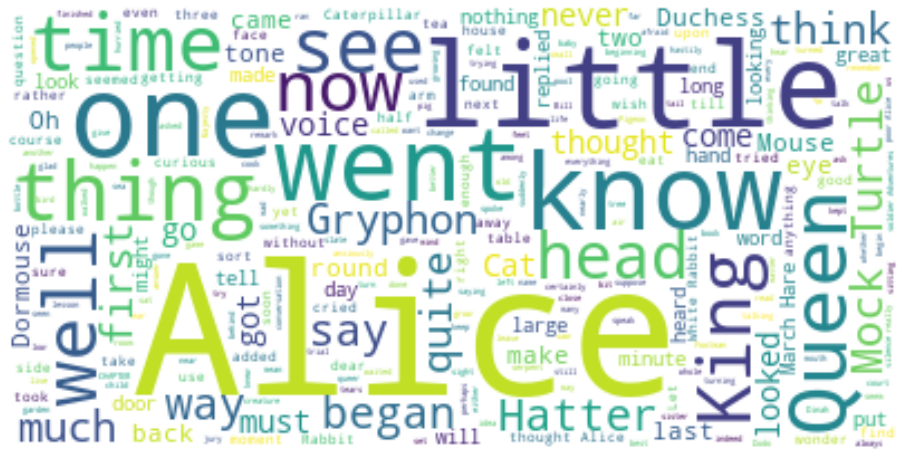

In [26]:
STOPWORDS.add('said')

alice_wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS
)
alice_wordcloud.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
alice_mask = np.array(Image.open('./data/alice_mask.png'))
print(len(alice_mask))

900


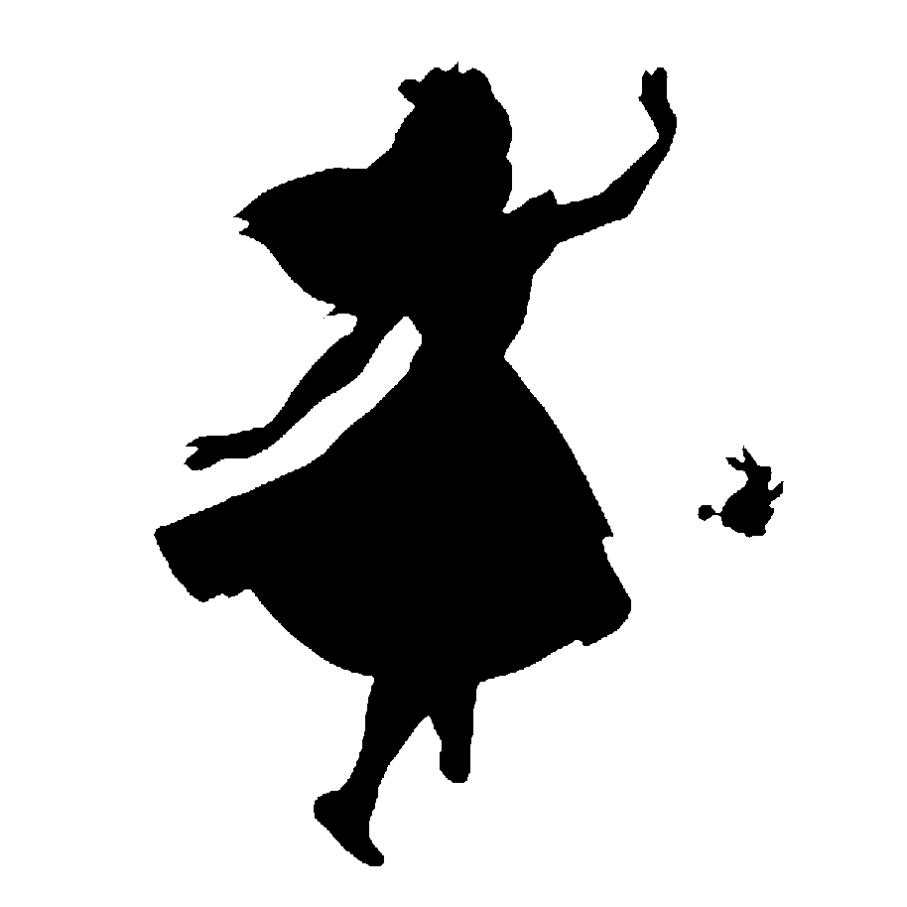

In [28]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

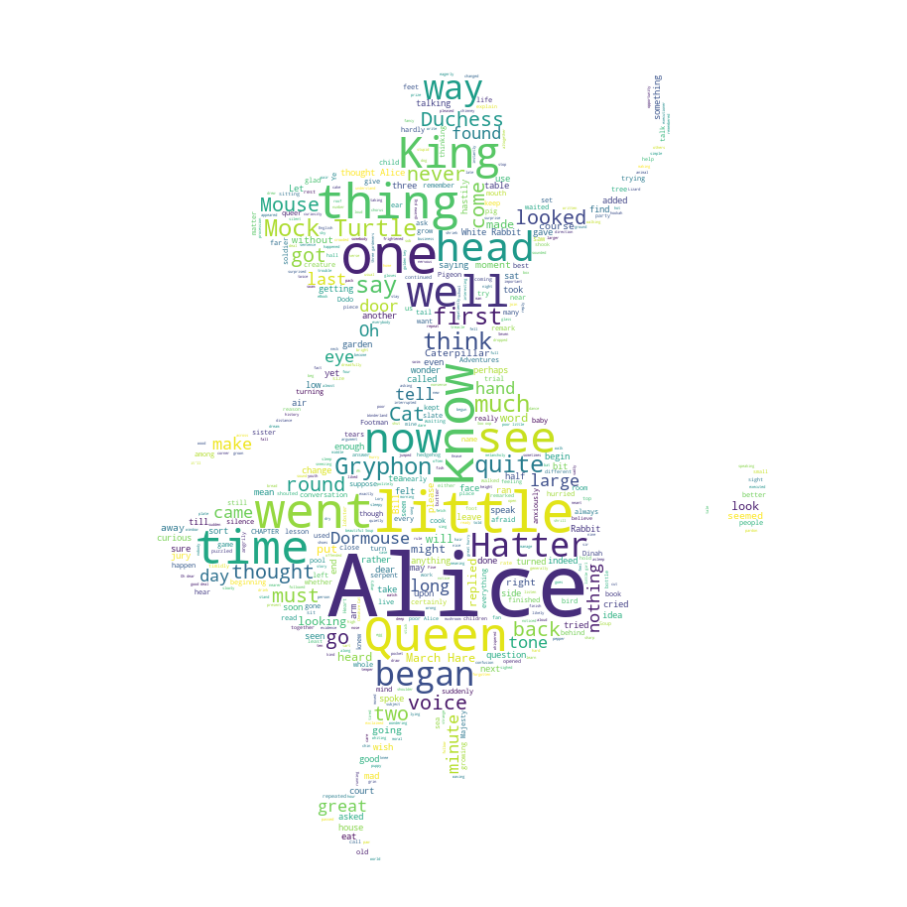

In [37]:
alice_mask = np.array(Image.open('./data/alice_mask.png'))

alice_wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=STOPWORDS,
    mask=alice_mask
)
alice_wordcloud.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
# membuat wordcloud dari data excel

df_can = pd.read_excel('./data/Canada.xlsx',
                        sheet_name="Canada by Citizenship",
                        skiprows=(20),
                        skipfooter=2)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'AreaName', 'RegName', 'DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)

years = range(1980, 2014)
print(years)

df_can.drop(years, axis=1, inplace=True)
df_can.head()

range(1980, 2014)


,Total
Country,
Afghanistan,58639
Albania,15699
Algeria,69439
American Samoa,6
Andorra,15


In [55]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [81]:
max_words = 1000
word_string = ""
for country in df_can.index.values:
    if (len(country.split(" ")) > 1):
        s_country = country.split(" ") # dari "United States of America"
        s_country = "".join(s_country) # jadi "UnitedStatesofAmerica"
    else:
        s_country = country 
    repeat_num = int( df_can.loc[country, 'Total']/float(total_immigration) * max_words )
    word_string += (s_country + ' ') * repeat_num
print(len(word_string))

12270


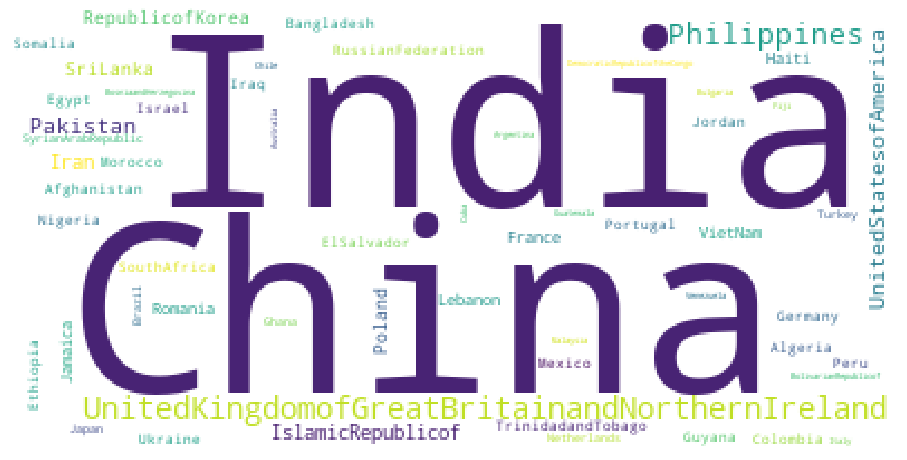

In [82]:
can_immi_wordcloud = WordCloud(
    background_color="white",
    collocations=False
)
can_immi_wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(can_immi_wordcloud, interpolation='none')
plt.axis('off')
plt.show()

In [83]:
# regression plot
!pip install seaborn
import seaborn as sns

In [91]:
df_can = pd.read_excel('./data/Canada.xlsx',
                        sheet_name="Canada by Citizenship",
                        skiprows=(20),
                        skipfooter=2)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'AreaName', 'RegName', 'DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country'}, inplace=True)
df_can.set_index('Country', inplace=True)

df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.reset_index(inplace=True)
df_tot.columns = ['Year', 'Total']
df_tot.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Text(0.5, 0, 'Tahun')

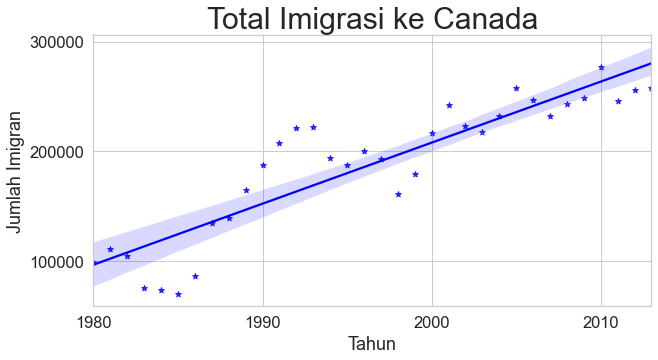

In [101]:
plt.figure(figsize=(10,5))
ax = sns.regplot(x='Year', y='Total', data=df_tot, color="blue", marker="*")

sns.set(font_scale=2.5)
sns.set_style("whitegrid")

ax.set_title("Total Imigrasi ke Canada")
ax.set_ylabel("Jumlah Imigran")
ax.set_xlabel("Tahun")

In [103]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [108]:
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [111]:
df_tot = pd.DataFrame(df_countries.sum(axis=1))
df_tot.reset_index(inplace=True)
df_tot.columns = ['Year', 'Total']
df_tot.head()

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Text(0.5, 0, 'Tahun')

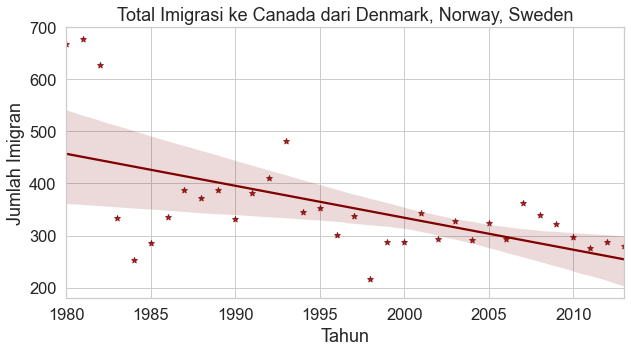

In [112]:
plt.figure(figsize=(10,5))
ax = sns.regplot(x='Year', y='Total', data=df_tot, color="maroon", marker="*")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ax.set_title("Total Imigrasi ke Canada dari Denmark, Norway, Sweden")
ax.set_ylabel("Jumlah Imigran")
ax.set_xlabel("Tahun")

In [113]:
# Visualisasi data di MAP dengan folium

!pip install folium
import folium

In [126]:
world_map = folium.Map(tiles='Stamen Watercolor')
world_map

In [125]:
folium.Map(location=[-6.120214, 106.171516], zoom_start=18)

In [127]:
# coba tambahkan Marker ke Map, ambil data dulu:

df_incidents = pd.read_csv('./data/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [128]:
df_incidents.shape

(150500, 13)

In [129]:
df_incidents = df_incidents.iloc[0:100, :]
df_incidents.shape

(100, 13)

In [132]:
latitude = 37.77
longitude = -122.42
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)
map_sf

In [158]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = folium.map.FeatureGroup()

# udah bikin grup, masukin titik yg kita mau ke dalam sana
for lat, lon, label, in zip(df_incidents['Y'], df_incidents['X'], df_incidents['Category']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius = 3,
            color = 'green',
            fill = True,
            fill_color = 'green',
            fill_opacity = 0.5,
            popup=label
        )
    )

map_sf.add_child(incidents)

In [160]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = folium.map.FeatureGroup()

# udah bikin grup, masukin titik yg kita mau ke dalam sana
for lat, lon, label, in zip(df_incidents['Y'], df_incidents['X'], df_incidents['Category']):
    incidents.add_child(
        folium.Marker(
            [lat, lon],
            popup=label,
            icon=None
        )
    )

map_sf.add_child(incidents)

In [161]:
from folium import plugins
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(map_sf)

for lat, lon, label, in zip(df_incidents['Y'],df_incidents['X'],df_incidents['Category']):
    folium.Marker(
        location=[lat, lon],
        popup=label
    ).add_to(incidents)

map_sf

In [163]:
# Making Choropleth Map (map tematik 1 warna)

!conda install -c anaconda xlrd --yes

# pakai data Citizenship Canada
df_can = pd.read_excel('./data/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Solving environment: ...working... done

# All requested packages already installed.

Data downloaded and read into a dataframe!


In [165]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str,df_can.columns))
df_can['Total']=df_can.sum(axis=1)
years = list(map(str,range(1980,2014)))
print(df_can.shape)
print(df_can.head())

(195, 39)
          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   62

In [177]:
world_geo = r'./data/world_countries.json'

world_map = folium.Map(
        location=[0,0], 
        zoom_start=2, 
        tiles='"http://{s}.tiles.mapbox.com/v4/wtgeographer.2fb7fc73/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY2twMjV2ajdkMTZrbzJucHI3YTgxbjM2diJ9.oHD6Rw0KJYhnaYzK2pL__Q',
        attr='XXX Mapbox Attribution'
    )

folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map